In [23]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

In [24]:
import nltk

stopwords = set(nltk.corpus.stopwords.words("english"))

In [25]:
def drop_stopwords(sentence1, sentence2):
    s1_tokens = []
    s2_tokens = []
    for i in sentence1.split(' '):
        if i not in stopwords:
            s1_tokens.append(i)
    for i in sentence2.split(' '):
        if i not in stopwords:
            s2_tokens.append(i)
    return ' '.join(s1_tokens), ' '.join(s2_tokens)

def avg(l1, l2):
    return (sum(l1)+sum(l2))/(2*len(l1))

def plot_sentence(l1, l2, similarities):
    df = pd.DataFrame(dict(sentance1=l1, sentance2=l2, similarity=similarities))
    sns.lmplot('sentance1', 'sentance2', data=df, hue='similarity', palette="Blues", fit_reg=False)

In [26]:
def plot_sentence_corr(without_stopwords=False):
    with open('data/train-en-en.out', 'r') as f_out:
        similarities = [float(i) for i in f_out.readlines()]
    with open('data/train-en-en.in', 'r') as f:
        length_sum = 0
        length_count = 0
        tokens_per_sentence = 0
        tokens_per_sentence_length = 0
        lines = f.readlines()
        sentence1_lengths = []
        sentence2_lengths = []
        sentence1_token_lengths = []
        sentence2_token_lengths = []
        for i in range(len(lines)):
            sentences = lines[i].split('\t')
            sentence1 = sentences[0]
            sentence2 = sentences[1]
            if without_stopwords:
                sentence1, sentence2 = drop_stopwords(sentence1, sentence2)
            sentence1_lengths.append(len(sentence1))
            sentence2_lengths.append(len(sentence2))
            sentence1_token_lengths.append(len(sentence1.split(' ')))
            sentence2_token_lengths.append(len(sentence2.split(' ')))
            # try with removed stopwords
    print("Average sentance length: ", avg(sentence1_lengths, sentence2_lengths))
    print("Average tokens per sentance: ", avg(sentence1_token_lengths, sentence2_token_lengths))
    plot_sentence(sentence1_lengths, sentence2_lengths, similarities)
    plot_sentence(sentence1_token_lengths, sentence2_token_lengths, similarities)

Average sentance length:  43.838
Average tokens per sentance:  8.702


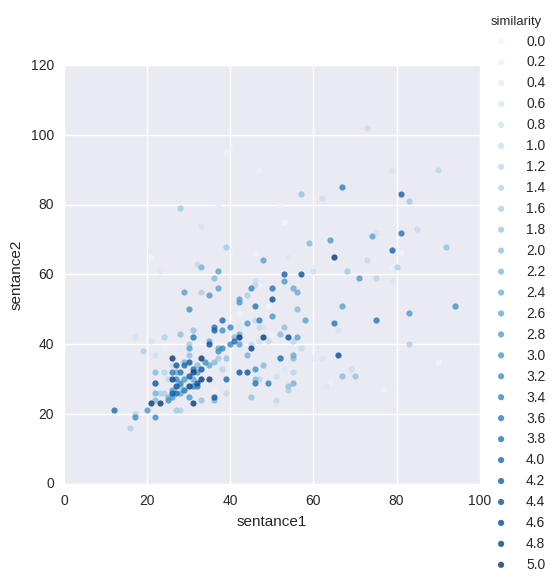

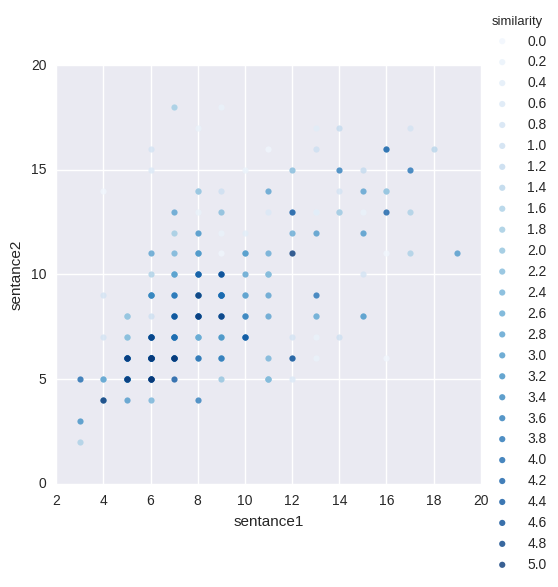

In [27]:
plot_sentence_corr()

Average sentance length:  33.004
Average tokens per sentance:  5.488


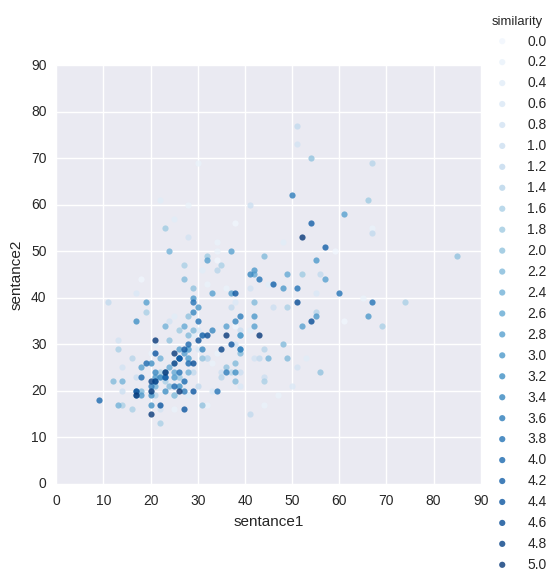

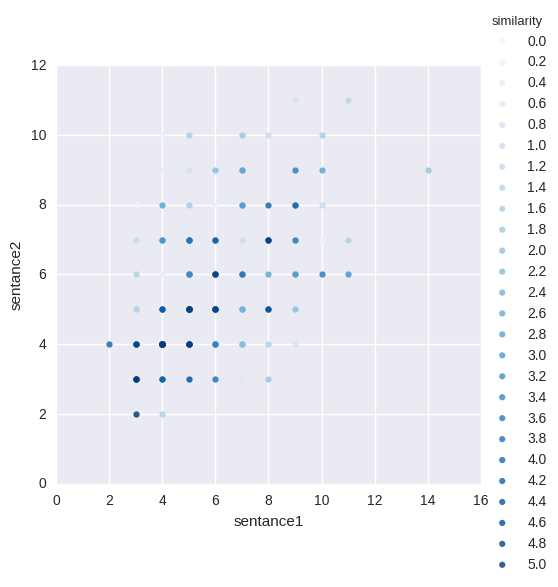

In [28]:
plot_sentence_corr(True)